In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.contrib.layers import l2_regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-09-23 18:04:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-09-23 18:04:01 (99.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(60))
model.add(Dense(512, activation='relu', kernel_regularizer=l2_regularizer(0.001)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 100)           80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60)                38640     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               31232     
_________________________________________________________________
dense_6 (Dense)              (None, 3211)              1647243   
Total params: 2,118,615
Trainable params: 2,118,615
Non-trainable params: 0
___________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

W0923 18:35:44.536643 140185221072768 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 29s 2ms/sample - loss: 6.8617 - acc: 0.0220
Epoch 2/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.5149 - acc: 0.0219
Epoch 3/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.4191 - acc: 0.0248
Epoch 4/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.2879 - acc: 0.0341
Epoch 5/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.1582 - acc: 0.0364
Epoch 6/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.0486 - acc: 0.0389
Epoch 7/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 5.9425 - acc: 0.0429
Epoch 8/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 5.8372 - acc: 0.0455
Epoch 9/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 5.7314 - acc: 0.0477
Epoch 10/100
15462/15462 [==============================] - 28s 2ms/sampl

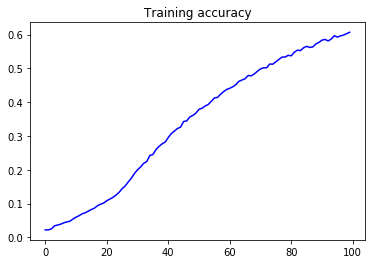

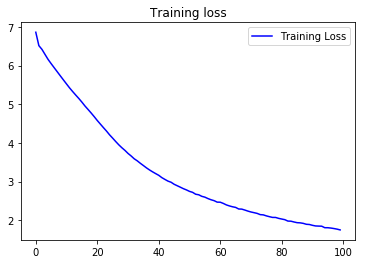

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope so rehearse to give days of heart ' of write in thee not hence love so thought my friend i show thy mind time 'will friend strong ' still still still free free hell groan ' of thee thee thee of me such name more more muse seem say bright ' rolling due to this friend know thy deeds ' to be gone said to show me call my gaol ' still 'greeing new done see due of this 'no ' still due to time now go of heart fall so great chary forth laws ' forth due of you


In [0]:
 history = model.fit(predictors, label, epochs=20, verbose=1)

Epoch 1/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.7300 - acc: 0.6123
Epoch 2/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.7177 - acc: 0.6174
Epoch 3/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.7224 - acc: 0.6164
Epoch 4/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.7046 - acc: 0.6172
Epoch 5/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.6880 - acc: 0.6186
Epoch 6/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.6770 - acc: 0.6228
Epoch 7/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.6599 - acc: 0.6306
Epoch 8/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.6709 - acc: 0.6273
Epoch 9/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 1.6499 - acc: 0.6345
Epoch 10/20
15462/15462 [==============================] - 28s 2ms/sample - loss: 